**Practice Problem AND Task 1**

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
               'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le =LabelEncoder()
Outlook=le.fit_transform(Outlook)
Temperature=le.fit_transform(Temperature)
Humidity=le.fit_transform(Humidity)
Wind=le.fit_transform(Wind)
Play=le.fit_transform(Play)

print("Outlook : \n",Outlook)
print("\nTemperature : \n",Temperature)
print("\nHumidity : \n",Humidity)
print("\nWind : \n",Wind)
print("\nPlay : \n",Play)

features=tuple(zip(Outlook,Temperature,Humidity,Wind))
label=Play

print("\nFeatures : \n",features)
print("\nLabel : \n",label)

Outlook : 
 [1 1 0 2 2 2 0 1 1 2 1 0 0 2]

Temperature : 
 [1 1 1 2 0 0 0 2 0 2 2 2 1 2]

Humidity : 
 [0 0 0 0 1 1 1 0 1 1 1 0 1 0]

Wind : 
 [0 1 0 0 0 1 1 0 0 0 1 1 0 1]

Play : 
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

Features : 
 ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))

Label : 
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
data_train,data_test,target_train,target_test = train_test_split(features,label,test_size=0.10,random_state=61)

gnd=GaussianNB();
gnd.fit(data_train,target_train)
predict = gnd.predict(data_test)
print("\nPrediction : ",predict)
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,predict))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,predict) )
print("\nPrecision score : ",precision_score(target_test,predict))
print("\nRecall score : ",recall_score(target_test,predict))


Prediction :  [1 1]

Acccuracy Score :  1.0

Confusion Matrix : 
 [[2]]

Precision score :  1.0

Recall score :  1.0


In [5]:
gnd=GaussianNB();
gnd.fit(features,label)

print("\nPrediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') : ",gnd.predict([[1,2,1,0]]))

print("\nPrediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) :  ",gnd.predict([[2,0,0,1]]))


Prediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') :  [1]

Prediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) :   [0]


**Using decision Tree**

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
data_train,data_test,target_train,target_test = train_test_split(features,label,test_size=0.10,random_state=61)

clf=DecisionTreeClassifier(criterion="entropy",random_state=61)
clf.fit(data_train,target_train)

#1
pred1=clf.predict([[1,2,1,0],[2,0,0,1]])
print("\nPrediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') : ",pred1[0])
print("\nPrediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) : ",pred1[1])
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,pred1))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,pred1) )
print("\nPrecision score : ",precision_score(target_test,pred1))
print("\nRecall score : ",recall_score(target_test,pred1))


pred = clf.predict(data_test)
print("\nPrediction : ",pred)
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,pred))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,pred) )
print("\nPrecision score : ",precision_score(target_test,pred))
print("\nRecall score : ",recall_score(target_test,pred))


Prediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') :  1

Prediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) :  0

Acccuracy Score :  0.5

Confusion Matrix : 
 [[0 0]
 [1 1]]

Precision score :  1.0

Recall score :  0.5

Prediction :  [1 1]

Acccuracy Score :  1.0

Confusion Matrix : 
 [[2]]

Precision score :  1.0

Recall score :  1.0


[Text(0.4, 0.9, 'outlook <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]\nclass = play_yes'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = play_yes'),
 Text(0.5, 0.7, 'humidity <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = play_no'),
 Text(0.2, 0.5, 'outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = play_no'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = play_no'),
 Text(0.3, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = play_no'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = play_yes'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = play_no'),
 Text(0.8, 0.5, 'temperature <= 1.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = play_yes'),
 Text(0.7, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = play_no'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = play_yes'),
 Text(0.8, 0

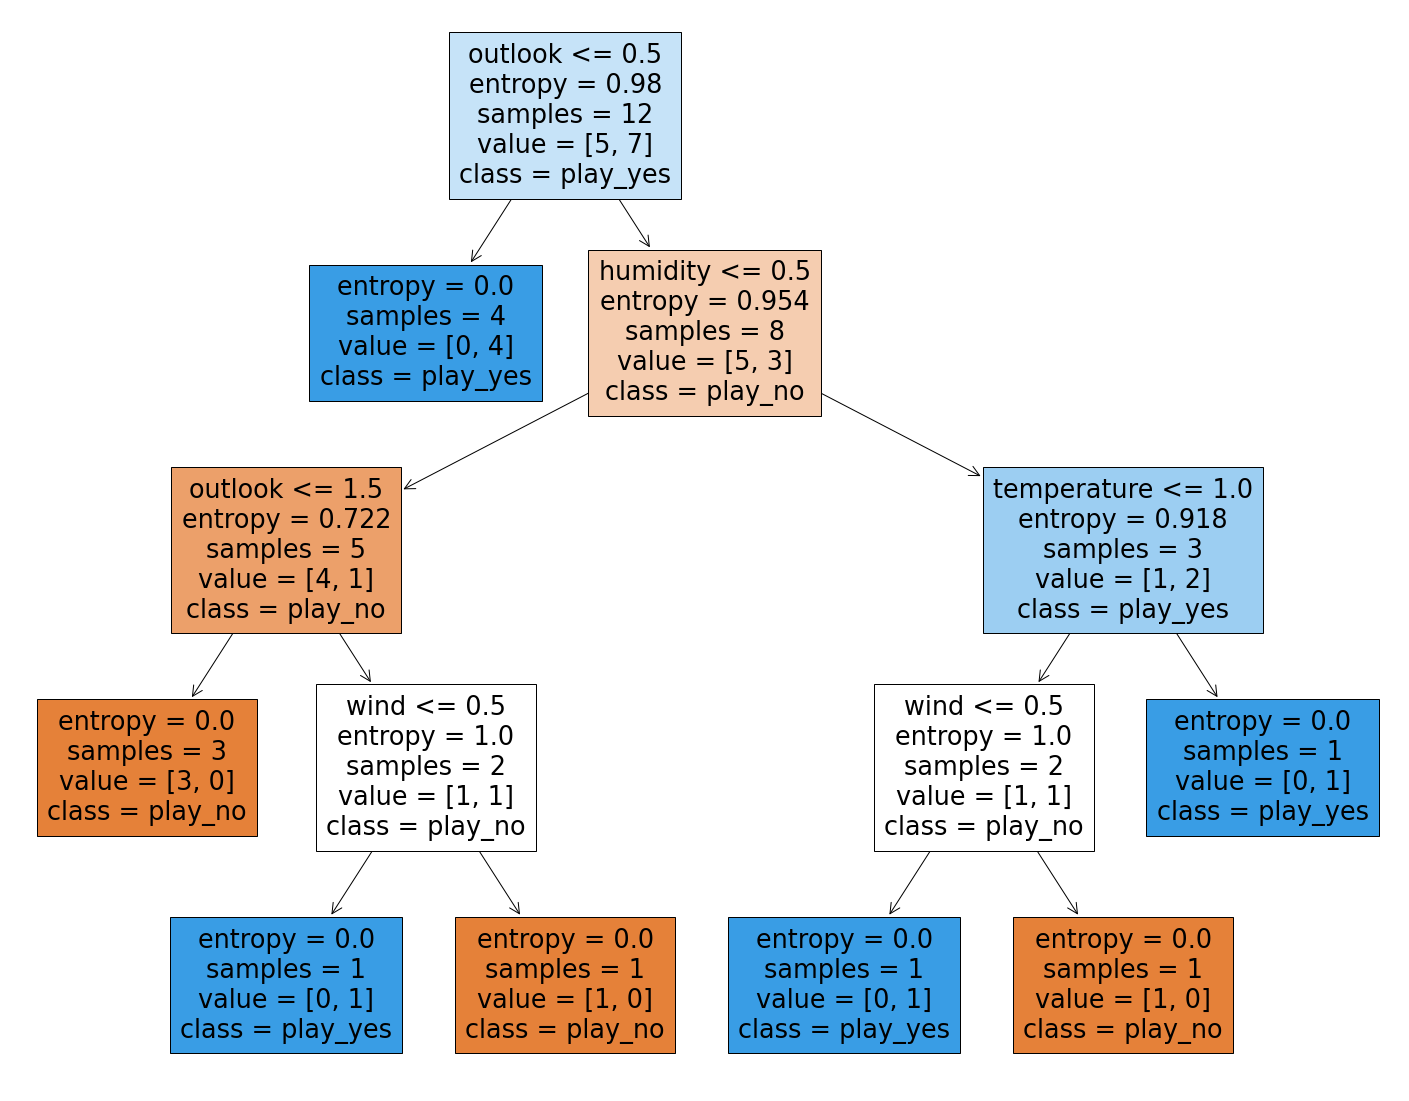

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'],filled=True)

In [9]:
fig.savefig("decision_tree_1.png")

In [11]:
https://www.kaggle.com/ronitf/heart-disease-uci

SyntaxError: ignored

**TASK 2**

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
x,y=load_breast_cancer(return_X_y = True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=61)

clf=DecisionTreeClassifier(random_state=61)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print("pridiction : ",pred)
print("\naccuracy score : ",accuracy_score(y_test,pred))
print("\nPrecision score : ",precision_score(y_test,pred))
print("\nRecall score : ",recall_score(y_test,pred))

pridiction :  [1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 1]

accuracy score :  0.9385964912280702

Precision score :  0.9444444444444444

Recall score :  0.9577464788732394


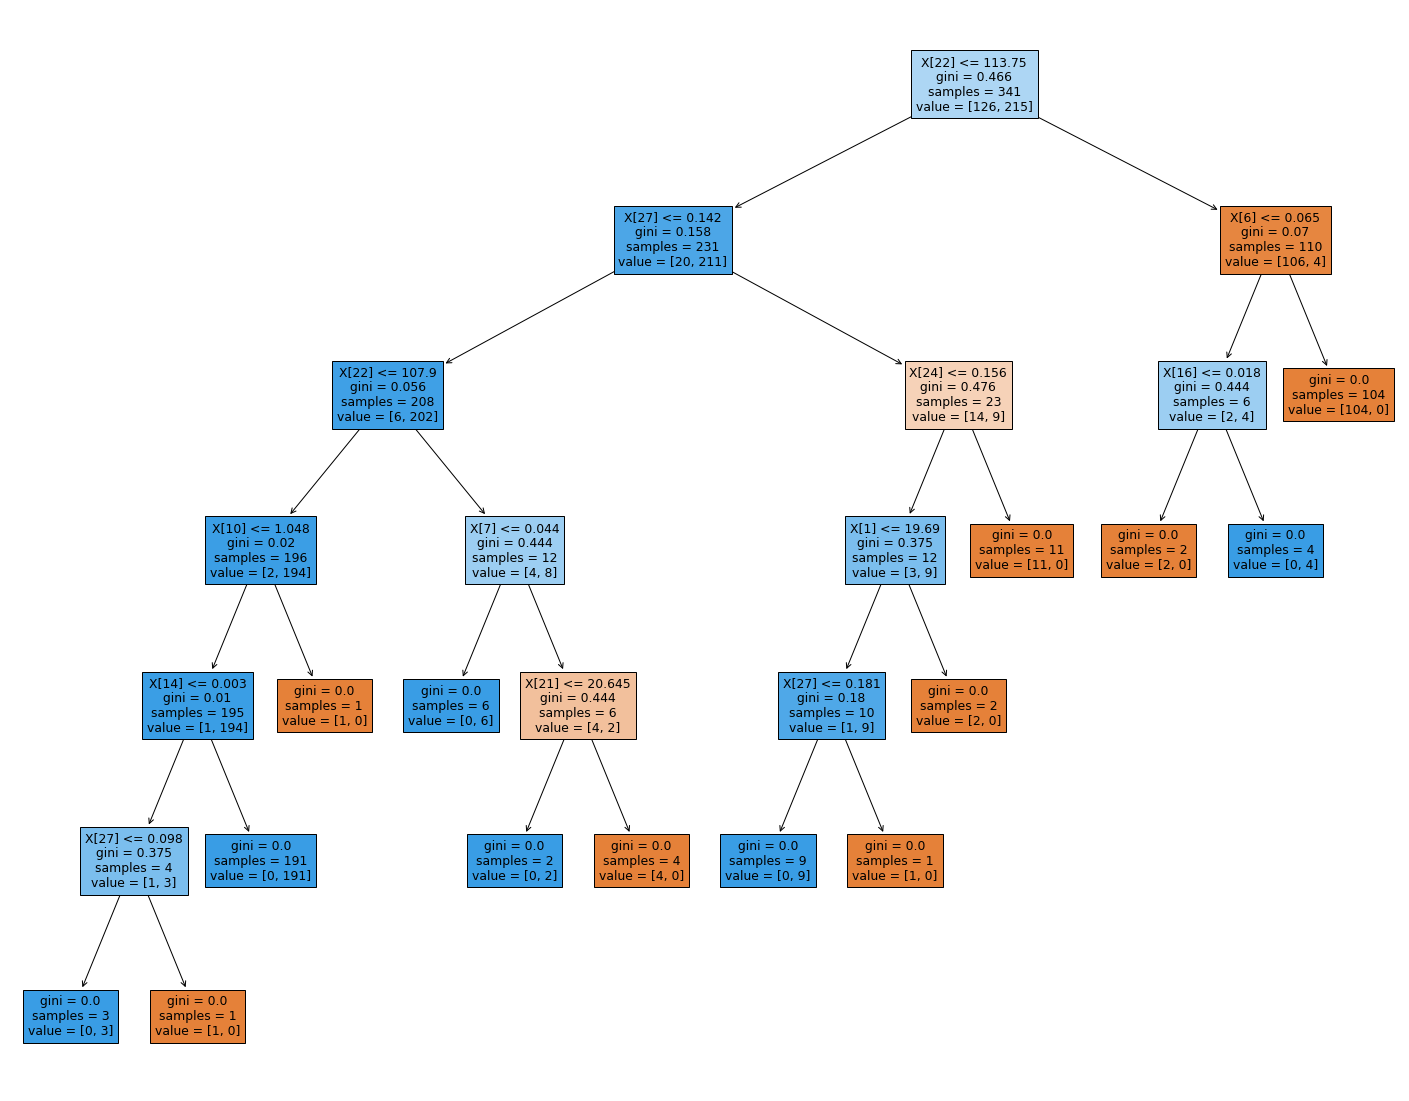

In [14]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)

fig.savefig("decision_tree_2.png")

**POST PRUNING**

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [16]:
x,y=load_breast_cancer(return_X_y = True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=61)
clf=DecisionTreeClassifier(random_state=61)

path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
print(ccp_alphas)

[0.         0.00291751 0.00527859 0.00577548 0.00752166 0.00782014
 0.00791789 0.01478717 0.01893408 0.04083997 0.33618693]


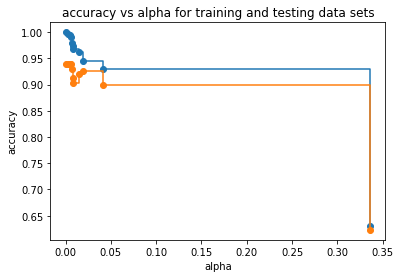

In [17]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=61,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

train_scores=[clf.score(x_train,y_train) for clf in clfs]
test_scores=[clf.score(x_test,y_test) for clf in clfs]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing data sets")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")

In [18]:
clf=DecisionTreeClassifier(random_state=61,ccp_alpha=0.03)
clf.fit(x_train,y_train)

pred=clf.predict(x_test)
print("prediction : ",pred);
print("\naccuracy score : ",accuracy_score(y_test,pred))

prediction :  [1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 1 1]

accuracy score :  0.9254385964912281


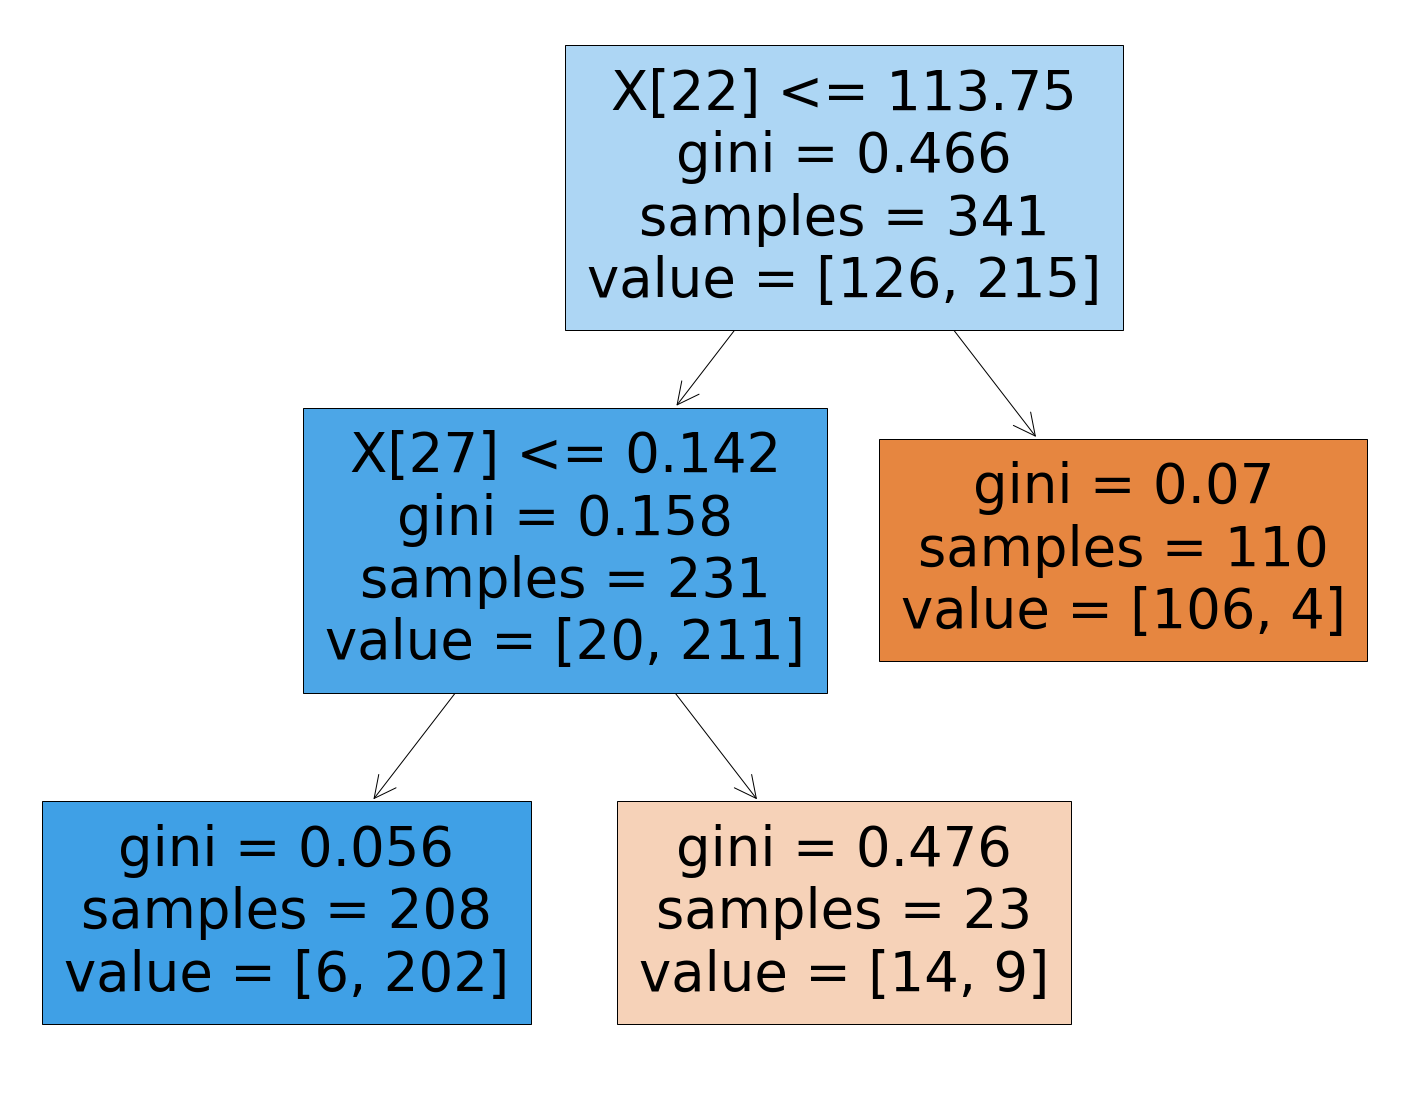

In [19]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)
fig.savefig("decision_tree_3.png")